In [3]:
import pandas as pd 
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
##failed2 = []
##passed2 = []
#for x in all_tickers.index[100:200]:
   # try:
      #  data_frame2[x] = web.DataReader(x, data_source= "yahoo", start = "2019-1-1")["Adj Close"]
      #  passed2.append(x)
    #except (IOError, KeyError):
       # msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        #failed2.append(x)

In [5]:
sandp  = pd.read_csv('resources/sandpdata.csv')

In [6]:
len(sandp["Symbol"])

480

In [7]:
data = pd.DataFrame()

In [8]:
failed2 = []
passed2 = []
for x in sandp["Symbol"]:
    try:
        data[x] = web.DataReader(x, data_source= "yahoo", start = "2019-1-1")["Adj Close"]
        passed2.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        failed2.append(x)

In [10]:
failed2

['GGP', 'MON']

In [11]:
data.head()

,MMM,AOS,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AMD,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,183.068054,42.443329,68.076973,82.120384,138.303879,46.655220,114.642334,224.570007,157.235001,18.830000,...,147.045517,100.250526,46.639339,19.286905,85.283569,65.474289,89.536743,101.280602,40.154263,83.823868
2019-01-03,176.174835,41.418125,64.864136,79.414642,133.581940,44.998528,110.881607,215.699997,162.143646,17.049999,...,143.960770,99.280663,46.455570,18.865334,82.072556,63.229786,87.284607,99.448669,39.932148,80.926529
2019-01-04,183.422806,43.077972,66.715439,81.973129,138.776093,46.794102,116.074997,226.190002,158.121140,19.000000,...,147.851089,103.284927,46.910160,19.593504,85.872749,65.897575,89.556320,102.845154,41.158604,84.101685
2019-01-07,183.000946,43.849316,67.714539,83.169548,139.258118,48.113506,117.806122,229.259995,160.441040,20.570000,...,148.941528,105.119019,46.707050,20.015074,88.141090,64.922997,89.458405,102.884758,41.322777,84.607712
2019-01-08,183.767899,44.923336,66.901543,83.556091,142.779892,49.571793,119.925255,232.679993,159.325897,20.750000,...,149.894470,108.412689,47.248684,20.676178,86.461929,65.533348,89.282150,100.577530,41.699402,85.867859


In [12]:
len(data.columns)

478

In [13]:
sandp.set_index("Symbol", inplace=True)

In [14]:
sandp.drop(failed2, inplace=True )

In [15]:
sandp.head()

,Name,Sector
Symbol,,
MMM,3M Company,Industrials
AOS,A.O. Smith Corp,Industrials
ABT,Abbott Laboratories,Health Care
ABBV,AbbVie Inc.,Health Care
ACN,Accenture plc,Information Technology


In [16]:
len(sandp.index)

478

## lets check for missing data

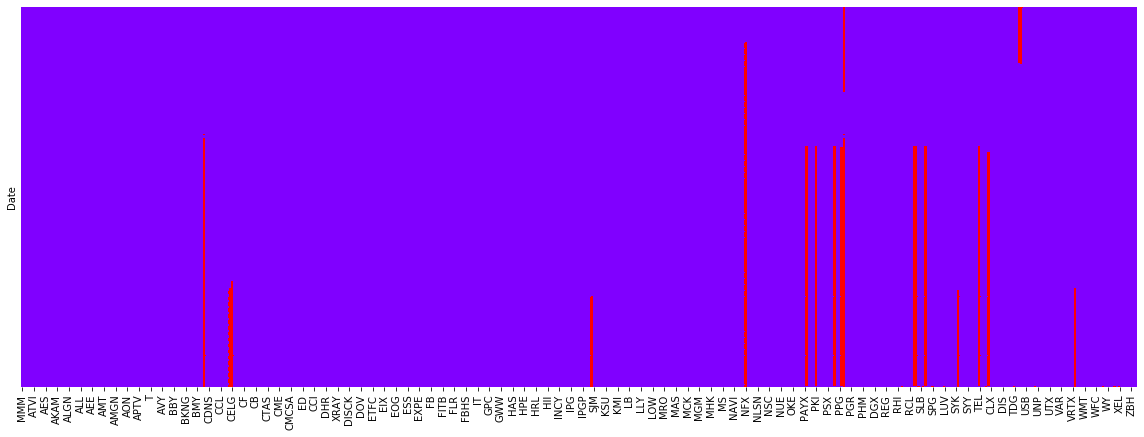

In [17]:
plt.figure(figsize=(20,7))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="rainbow")

In [18]:
data.dropna(axis=1, inplace=True)

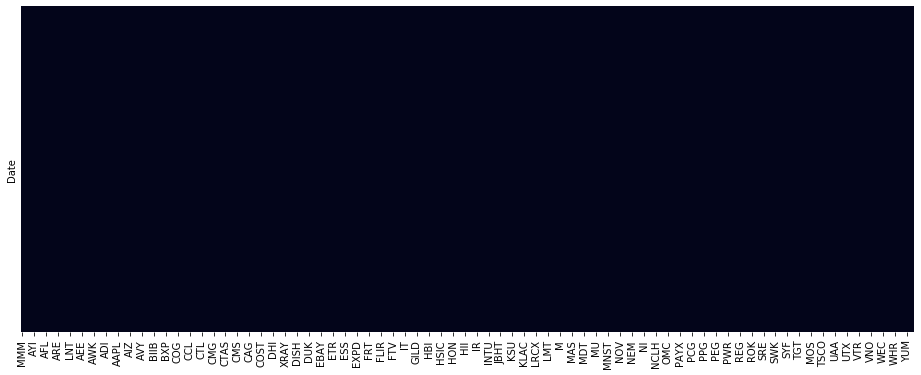

In [19]:
plt.figure(figsize=(16,6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 316 entries, 2019-01-02 to 2020-04-02
Columns: 448 entries, MMM to ZTS
dtypes: float64(448)
memory usage: 1.1 MB


In [21]:
data.to_csv('resources/final_adj.csv')

In [22]:
sandp.to_csv("resources/final_sandp.csv")

In [23]:
returns_frame = pd.DataFrame()

In [24]:
for x in data:
    returns_frame[f"{x} daily returns"] = data[f"{x}"].pct_change()

In [25]:
len(returns_frame.columns)

448

In [26]:
len(data.columns)

448

In [27]:
returns_frame

,MMM daily returns,AOS daily returns,ABT daily returns,ABBV daily returns,ACN daily returns,ATVI daily returns,AYI daily returns,ADBE daily returns,AAP daily returns,AMD daily returns,...,WHR daily returns,WMB daily returns,WYNN daily returns,XRX daily returns,XLNX daily returns,XYL daily returns,YUM daily returns,ZBH daily returns,ZION daily returns,ZTS daily returns
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.037654,-0.024155,-0.047194,-0.032948,-0.034142,-0.035509,-0.032804,-0.039498,0.031219,-0.094530,...,-0.003336,0.008474,-0.009674,-0.021858,-0.037651,-0.034281,-0.025153,-0.018088,-0.005532,-0.034565
2019-01-04,0.041141,0.040075,0.028541,0.032217,0.038884,0.039903,0.046837,0.048632,-0.024808,0.114370,...,0.048903,0.041575,0.040333,0.038598,0.046303,0.042192,0.026027,0.034153,0.030713,0.039235
2019-01-07,-0.002300,0.017906,0.014976,0.014595,0.003473,0.028196,0.014914,0.013573,0.014672,0.082632,...,0.029162,0.025478,0.017758,0.021516,0.026415,-0.014789,-0.001093,0.000385,0.003989,0.006017
2019-01-08,0.004191,0.024493,-0.012006,0.004648,0.025290,0.030309,0.017988,0.014918,-0.006950,0.008751,...,0.022479,0.029814,0.031333,0.033030,-0.019051,0.009401,-0.001970,-0.022425,0.009114,0.014894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,-0.021589,-0.011534,-0.016489,-0.015712,-0.049375,-0.013167,-0.032929,-0.052190,-0.015651,-0.019368,...,0.012740,-0.023860,-0.114669,-0.090628,-0.063029,-0.036906,-0.095314,-0.058602,0.007673,-0.052074
2020-03-30,0.033774,0.047490,0.064109,0.035365,0.042608,0.026510,0.035499,0.041069,0.009414,0.027480,...,0.040945,-0.006470,-0.034908,0.016421,0.054906,0.011298,0.031227,0.035180,-0.002175,0.043930
2020-03-31,-0.008930,-0.020466,-0.005420,0.012626,-0.038629,0.017274,-0.001166,-0.000471,-0.032953,-0.049728,...,-0.021776,0.023878,-0.014894,0.055153,-0.017769,-0.016757,-0.030282,0.028490,-0.027616,0.008656


## calculate mean daily returns for each security

In [28]:
mean_Daily_returns = []
for x in returns_frame:
    mean_Daily_returns.append(returns_frame[x].mean()  * 252)

In [29]:
len(mean_Daily_returns)

448

### Calulate the volitility for each security

In [30]:
security_vol = []
for x in returns_frame:
    security_vol.append(returns_frame[x].std() * np.sqrt(252))


In [31]:
len(security_vol)

448

### lets create a new frame withe secrity/vol/returns 

In [32]:
working_frame = pd.DataFrame(mean_Daily_returns, index=returns_frame.columns, columns=["mean daily returns"])

In [33]:
working_frame["volitility"] = security_vol

In [34]:
working_frame

,mean daily returns,volitility
MMM daily returns,-0.189543,0.335155
AOS daily returns,-0.066389,0.310284
ABT daily returns,0.161891,0.320554
ABBV daily returns,-0.032718,0.337630
ACN daily returns,0.159897,0.316180
...,...,...
XYL daily returns,0.031667,0.368883
YUM daily returns,-0.188152,0.343256
ZBH daily returns,-0.010241,0.366942
ZION daily returns,-0.289425,0.342876


In [35]:
abbrv = [x.split()[0] for x in working_frame.index]

In [36]:
working_frame["ticker"] = abbrv

In [37]:
working_frame

,mean daily returns,volitility,ticker
MMM daily returns,-0.189543,0.335155,MMM
AOS daily returns,-0.066389,0.310284,AOS
ABT daily returns,0.161891,0.320554,ABT
ABBV daily returns,-0.032718,0.337630,ABBV
ACN daily returns,0.159897,0.316180,ACN
...,...,...,...
XYL daily returns,0.031667,0.368883,XYL
YUM daily returns,-0.188152,0.343256,YUM
ZBH daily returns,-0.010241,0.366942,ZBH
ZION daily returns,-0.289425,0.342876,ZION


## We will need to being the sectors in to the new frame and align them with the proper ticker form the original sandp frame

In [38]:
ticker_and_sector_dict = dict(zip(sandp.index, sandp["Sector"]))

In [39]:
working_frame["sector"] = working_frame["ticker"].apply(lambda x: ticker_and_sector_dict[x])

In [40]:
working_frame

,mean daily returns,volitility,ticker,sector
MMM daily returns,-0.189543,0.335155,MMM,Industrials
AOS daily returns,-0.066389,0.310284,AOS,Industrials
ABT daily returns,0.161891,0.320554,ABT,Health Care
ABBV daily returns,-0.032718,0.337630,ABBV,Health Care
ACN daily returns,0.159897,0.316180,ACN,Information Technology
...,...,...,...,...
XYL daily returns,0.031667,0.368883,XYL,Industrials
YUM daily returns,-0.188152,0.343256,YUM,Consumer Discretionary
ZBH daily returns,-0.010241,0.366942,ZBH,Health Care
ZION daily returns,-0.289425,0.342876,ZION,Financials


In [41]:
company_name_tickers = dict(zip(working_frame["ticker"], sandp["Name"]))

In [42]:
working_frame["name"] = working_frame["ticker"].apply(lambda x: company_name_tickers[x])

In [43]:
working_frame

,mean daily returns,volitility,ticker,sector,name
MMM daily returns,-0.189543,0.335155,MMM,Industrials,3M Company
AOS daily returns,-0.066389,0.310284,AOS,Industrials,A.O. Smith Corp
ABT daily returns,0.161891,0.320554,ABT,Health Care,Abbott Laboratories
ABBV daily returns,-0.032718,0.337630,ABBV,Health Care,AbbVie Inc.
ACN daily returns,0.159897,0.316180,ACN,Information Technology,Accenture plc
...,...,...,...,...,...
XYL daily returns,0.031667,0.368883,XYL,Industrials,V.F. Corp.
YUM daily returns,-0.188152,0.343256,YUM,Consumer Discretionary,Valero Energy
ZBH daily returns,-0.010241,0.366942,ZBH,Health Care,Varian Medical Systems
ZION daily returns,-0.289425,0.342876,ZION,Financials,Ventas Inc


In [44]:
working_frame.to_csv("resources/working_Frame.csv")

In [45]:
working_frame.groupby("sector")["mean daily returns"].mean()

sector
Consumer Discretionary       -0.204920
Consumer Staples              0.103210
Energy                       -0.476645
Financials                   -0.095291
Health Care                   0.090754
Industrials                   0.005975
Information Technology        0.139732
Materials                    -0.006871
Real Estate                  -0.079171
Telecommunication Services   -0.043176
Utilities                     0.084770
Name: mean daily returns, dtype: float64

In [46]:
df_bySector = pd.DataFrame(working_frame.groupby("sector")["mean daily returns"].mean())

In [47]:
df_bySector.head()

,mean daily returns
sector,
Consumer Discretionary,-0.204920
Consumer Staples,0.103210
Energy,-0.476645
Financials,-0.095291
Health Care,0.090754


In [48]:
df_bySector["number of companies"] = working_frame.groupby("sector")["name"].count()

In [49]:
df_bySector

,mean daily returns,number of companies
sector,,
Consumer Discretionary,-0.204920,74
Consumer Staples,0.103210,32
Energy,-0.476645,27
Financials,-0.095291,60
Health Care,0.090754,56
Industrials,0.005975,61
Information Technology,0.139732,60
Materials,-0.006871,21
Real Estate,-0.079171,29


### Thre is low correlation to the number of companies and the mean deail returns for each sector

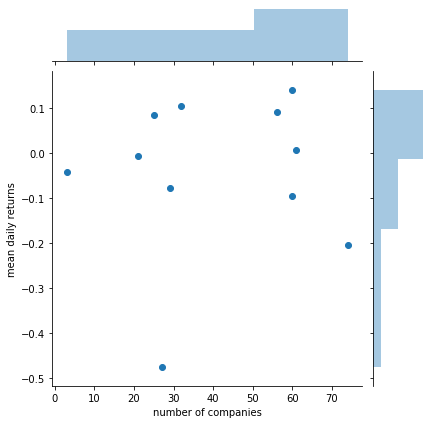

In [50]:
sns.jointplot(x = "number of companies", y = "mean daily returns", data=df_bySector)

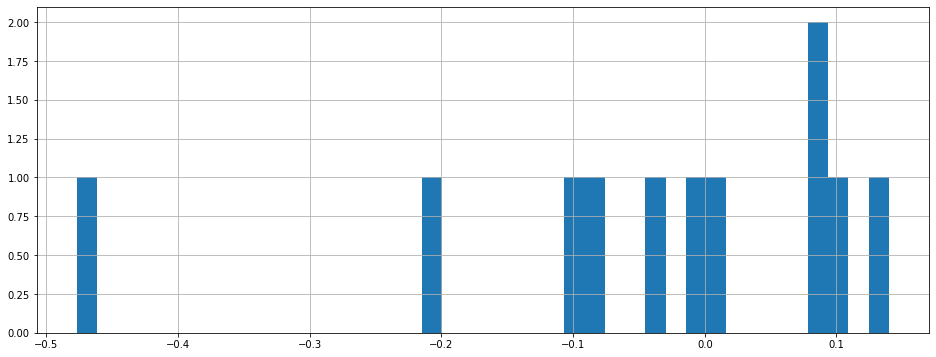

In [51]:
df_bySector["mean daily returns"].hist(figsize = (16,6), bins = 40)

In [52]:
working_frame.head()

,mean daily returns,volitility,ticker,sector,name
MMM daily returns,-0.189543,0.335155,MMM,Industrials,3M Company
AOS daily returns,-0.066389,0.310284,AOS,Industrials,A.O. Smith Corp
ABT daily returns,0.161891,0.320554,ABT,Health Care,Abbott Laboratories
ABBV daily returns,-0.032718,0.337630,ABBV,Health Care,AbbVie Inc.
ACN daily returns,0.159897,0.316180,ACN,Information Technology,Accenture plc


In [53]:
s_and_p_matrix = working_frame.pivot_table(index="name", columns= "sector", values="mean daily returns")

In [54]:
s_and_p_matrix

sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunication Services,Utilities
name,,,,,,,,,,,
3M Company,NaN,NaN,NaN,NaN,NaN,-0.189543,NaN,NaN,NaN,NaN,NaN
A.O. Smith Corp,NaN,NaN,NaN,NaN,NaN,-0.066389,NaN,NaN,NaN,NaN,NaN
AES Corp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058032
AFLAC Inc,NaN,NaN,NaN,-0.171219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMETEK Inc.,NaN,NaN,NaN,NaN,NaN,0.118525,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Valero Energy,-0.188152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Varian Medical Systems,NaN,NaN,NaN,NaN,-0.010241,NaN,NaN,NaN,NaN,NaN,NaN
Ventas Inc,NaN,NaN,NaN,-0.289425,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
tech_and_returns = s_and_p_matrix["Industrials"]

In [56]:
tech_and_returns

name
3M Company               -0.189543
A.O. Smith Corp          -0.066389
AES Corp                       NaN
AFLAC Inc                      NaN
AMETEK Inc.               0.118525
                            ...   
Valero Energy                  NaN
Varian Medical Systems         NaN
Ventas Inc                     NaN
Verisign Inc.                  NaN
eBay Inc.                      NaN
Name: Industrials, Length: 448, dtype: float64

In [57]:
returns_frame.corr()

,MMM daily returns,AOS daily returns,ABT daily returns,ABBV daily returns,ACN daily returns,ATVI daily returns,AYI daily returns,ADBE daily returns,AAP daily returns,AMD daily returns,...,WHR daily returns,WMB daily returns,WYNN daily returns,XRX daily returns,XLNX daily returns,XYL daily returns,YUM daily returns,ZBH daily returns,ZION daily returns,ZTS daily returns
MMM daily returns,1.000000,0.536277,0.643047,0.487126,0.630471,0.345567,0.559051,0.496744,0.448080,0.486619,...,0.635209,0.457843,0.435074,0.500732,0.645541,0.661234,0.495797,0.479103,0.590232,0.534118
AOS daily returns,0.536277,1.000000,0.514296,0.365064,0.482397,0.408070,0.447105,0.480039,0.419018,0.420130,...,0.528142,0.325012,0.456819,0.400804,0.485451,0.591811,0.285479,0.294526,0.539306,0.429007
ABT daily returns,0.643047,0.514296,1.000000,0.568785,0.744417,0.432100,0.536989,0.634800,0.475888,0.511759,...,0.674914,0.382331,0.337686,0.454814,0.503304,0.700058,0.558846,0.516294,0.581516,0.742798
ABBV daily returns,0.487126,0.365064,0.568785,1.000000,0.578879,0.389993,0.486822,0.547810,0.404403,0.435278,...,0.485274,0.482011,0.390744,0.427229,0.349523,0.535384,0.408664,0.439857,0.494271,0.547959
ACN daily returns,0.630471,0.482397,0.744417,0.578879,1.000000,0.514221,0.598343,0.752495,0.490116,0.565915,...,0.612709,0.625464,0.482827,0.604329,0.548626,0.729492,0.623251,0.633157,0.622985,0.710088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL daily returns,0.661234,0.591811,0.700058,0.535384,0.729492,0.416222,0.645349,0.664320,0.548736,0.511254,...,0.667423,0.569395,0.528742,0.635236,0.542932,1.000000,0.516297,0.490490,0.663911,0.651769
YUM daily returns,0.495797,0.285479,0.558846,0.408664,0.623251,0.179974,0.503545,0.392811,0.458697,0.354941,...,0.613886,0.544137,0.470731,0.543424,0.325061,0.516297,1.000000,0.677925,0.388056,0.656224
ZBH daily returns,0.479103,0.294526,0.516294,0.439857,0.633157,0.206167,0.514420,0.424565,0.372530,0.388705,...,0.492636,0.577621,0.518441,0.621574,0.311356,0.490490,0.677925,1.000000,0.470069,0.573771
ZION daily returns,0.590232,0.539306,0.581516,0.494271,0.622985,0.355553,0.547390,0.557413,0.473689,0.443110,...,0.634841,0.485921,0.519553,0.558229,0.517181,0.663911,0.388056,0.470069,1.000000,0.504148


## Correlations beow seems to be pretty good but some companies my be in the same sector as amazon which we are comparing to. So lets set up a frame an add the correlated companies to the fame as well as the sector. we will then look at companies that are not in the same sector as amazon

In [58]:
similar_to_amazon = returns_frame.corrwith(returns_frame["AMZN daily returns"]).sort_values(ascending =False)

In [59]:
corr_to_amazon = pd.DataFrame(similar_to_amazon, columns=["correlation"])

In [60]:
corr_to_amazon["ticker"] = [x.split()[0] for x in corr_to_amazon.index]

In [61]:
corr_to_amazon["sector"] = corr_to_amazon["ticker"].apply(lambda x: ticker_and_sector_dict[x])

## WE can se that maky of the correlation between the companies are in the same sector as amazon

In [62]:
corr_to_amazon.head(20)

,correlation,ticker,sector
AMZN daily returns,1.000000,AMZN,Consumer Discretionary
MSFT daily returns,0.746864,MSFT,Information Technology
ADBE daily returns,0.709465,ADBE,Information Technology
GOOGL daily returns,0.704071,GOOGL,Information Technology
GOOG daily returns,0.697487,GOOG,Information Technology
ANSS daily returns,0.675598,ANSS,Information Technology
CDNS daily returns,0.673234,CDNS,Information Technology
FB daily returns,0.667672,FB,Information Technology
AAPL daily returns,0.665357,AAPL,Information Technology
SNPS daily returns,0.659040,SNPS,Information Technology


## add company Names

In [78]:
ticandcomp = dict(list(zip(sandp.index, sandp["Name"])))

In [79]:
corr_to_amazon["name"] = corr_to_amazon["ticker"].apply(lambda x: ticandcomp[x])

In [80]:
corr_to_amazon.head(15)

,correlation,ticker,sector,name
AMZN daily returns,1.000000,AMZN,Consumer Discretionary,Amazon.com Inc.
MSFT daily returns,0.746864,MSFT,Information Technology,Microsoft Corp.
ADBE daily returns,0.709465,ADBE,Information Technology,Adobe Systems Inc
GOOGL daily returns,0.704071,GOOGL,Information Technology,Alphabet Inc Class A
GOOG daily returns,0.697487,GOOG,Information Technology,Alphabet Inc Class C
ANSS daily returns,0.675598,ANSS,Information Technology,ANSYS
CDNS daily returns,0.673234,CDNS,Information Technology,Cadence Design Systems
FB daily returns,0.667672,FB,Information Technology,"Facebook, Inc."
AAPL daily returns,0.665357,AAPL,Information Technology,Apple Inc.
SNPS daily returns,0.659040,SNPS,Information Technology,Synopsys Inc.


### Lets check where the sector is not the same as amazon 'IT"

In [81]:
corr_to_amazon[corr_to_amazon["sector"] != "Information Technology"].head(20)

,correlation,ticker,sector,name
AMZN daily returns,1.000000,AMZN,Consumer Discretionary,Amazon.com Inc.
TROW daily returns,0.636020,TROW,Financials,T. Rowe Price Group
AMP daily returns,0.607304,AMP,Financials,Ameriprise Financial
COST daily returns,0.590978,COST,Consumer Staples,Costco Wholesale Corp.
BLK daily returns,0.590779,BLK,Financials,BlackRock
FDX daily returns,0.588860,FDX,Industrials,FedEx Corporation
WRK daily returns,0.585393,WRK,Materials,WestRock Company
L daily returns,0.585005,L,Financials,Loews Corp.
CAT daily returns,0.575216,CAT,Industrials,Caterpillar Inc.
C daily returns,0.574404,C,Financials,Citigroup Inc.
